"""\
Clase 6: Python matricial para Renta Fija Local + SQL 2022\
"""

In [2]:
"""Calculos de riesgo"""

'Calculos de riesgo'

In [3]:

import Funciones as funciones
from Funciones import DB_class
import pandas as pd
import numpy as np
import scipy.optimize as opt

In [4]:

def Macaulay_duration_mat(parametros,prices):
    """
    Calcula la duracion de Macaulay de manera matricial y simultanea para un
    numero de titulos
    :return: Vector con duracion de Macaulay para cada titulo
    """
    try:
        coupon_dict = parametros['cpn_dict']
        cpn_m = coupon_dict['coupon_matrix']
        delta_t = parametros['delta_t']
        delta_t = delta_t.reshape(delta_t.size,1)
        discount_factors = parametros['discount_factors']
        ### Calculo de los cupones ponderados
        cpn_pond = np.multiply(cpn_m,delta_t)
        price_pond = np.multiply(cpn_pond,discount_factors).sum(axis=0)
        mac_dur = price_pond/prices
    except TypeError as ty:
        print('Hubo un error en el calculo de la funcion Macaulay_duration_mat')
        print(ty)
        raise TypeError
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion Macaulay_duration_mat')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion Macaulay_duration_mat')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion Macaulay_duration_mat')
        print(e)
        raise Exception 
    return mac_dur

In [5]:

def Modified_duration_mat(parametros,prices):
    """
    Calcula la duracion de modificada de manera matricial y simultanea para un
    numero de titulos, utilizando la funcion Macaulay_duration_mat 
    :return: Vector con duracion de modificada para cada titulo
    """
    try:
        discount_rates = np.array(parametros['discount_rates'])
        discount_tirs = 1/(1+discount_rates/100)
        #Calcularse con otra funcion
        mac_dur = Macaulay_duration_mat(parametros,prices)
        mod_dur = np.multiply(mac_dur,discount_tirs)
    except TypeError as ty:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat')
        print(ty)
        raise TypeError
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion Modified_duration_mat')
        print(e)
        raise Exception 
    return mod_dur

In [6]:

def Modified_duration_mat_2(parametros,prices,macaulay_duration):
    """
    Calcula la duracion de modificada de manera matricial y simultanea para un
    numero de titulos, utilizando el insumo de duracion de macaulay 
    :return: Vector con duracion de modificada para cada titulo
    """
    try:
        discount_rates = np.array(parametros['discount_rates'])
        discount_tirs = 1/(1+discount_rates/100)
        #Calcularse con otra funcion
        mod_dur = np.multiply(macaulay_duration,discount_tirs)
    except TypeError as ty:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_2')
        print(ty)
        raise TypeError
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_2')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_2')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_2')
        print(e)
        raise Exception 
    return mod_dur


In [7]:

def Convexity_mat(parametros,prices):
    """
    Calcula la convexidad de manera matricial y simultanea para un
    numero de titulos
    :return: Vector con convexidad para cada titulo
    """
    try:
        coupon_dict = parametros['cpn_dict']
        cpn_m = coupon_dict['coupon_matrix']
        delta_t = parametros['delta_t']
        delta_t = delta_t.reshape(delta_t.size,1)
        discount_rates = np.array(parametros['discount_rates'])
        discount_factors = parametros['discount_factors']
        ### Calculo de denominadores
        tir_discount = 1/(1+discount_rates/100)**2
        price_denom = 1/prices
        ### Calculo de los cupones ponderados
        time_pond = np.multiply(delta_t,delta_t+1)
        cpn_pond = np.multiply(cpn_m,time_pond)
        price_pond = np.multiply(cpn_pond,discount_factors).sum(axis=0)
        conv = price_denom*tir_discount*price_pond
    except TypeError as ty:
        print('Hubo un error en el calculo de la funcion Convexity_mat')
        print(ty)
        raise TypeError
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion Convexity_mat')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion Convexity_mat')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion Convexity_mat')
        print(e)
        raise Exception 
    return conv

In [8]:
####### Funciones matriciales con Loop

In [9]:

def Macaulay_duration_mat_loop(parametros,prices):
    """
    Calcula la duracion de Macaulay de manera vectorizada y a traves de un loop para un
    numero de titulos
    :return: Vector con duracion de Macaulay para cada titulo
    """
    try:
        coupon_dict = parametros['cpn_dict']
        cpn_m = coupon_dict['coupon_matrix']
        delta_t = parametros['delta_t']
        delta_t = delta_t.reshape(delta_t.size,1)
        discount_factors = parametros['discount_factors']
        mac_dur = []
        for j in range(len(prices)):
            ### Calculo de los cupones ponderados
            cpn_pond = np.multiply(cpn_m[:,j].reshape(delta_t.size,1),delta_t)
            price_pond = np.multiply(cpn_pond,discount_factors[:,j].reshape(cpn_pond.size,1)).sum(axis=0)
            mac_dur_j = price_pond[0]/prices[j]
            mac_dur.append(mac_dur_j)
    except TypeError as ty:
        print('Hubo un error en el calculo de la funcion Macaulay_duration_mat_loop')
        print(ty)
        raise TypeError
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion Macaulay_duration_mat_loop')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion Macaulay_duration_mat_loop')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion Macaulay_duration_mat_loop')
        print(e)
        raise Exception 
    return np.array(mac_dur)

In [10]:

def Modified_duration_mat_loop(parametros,prices):
    """
    Calcula la duracion de modificada de manera vectorizada  y a traves de un loop  para un
    numero de titulos, utilizando la funcion Macaulay_duration_mat_loop 
    :return: Vector con duracion de modificada para cada titulo
    """
    try:
        discount_rates = np.array(parametros['discount_rates'])
        discount_tirs = 1/(1+discount_rates/100)
        #Calcularse con otra funcion
        mac_dur = Macaulay_duration_mat_loop(parametros,prices)
        mod_dur = []
        for j in range(len(prices)):
            mod_dur_j = np.multiply(mac_dur[j],discount_tirs[j])
            mod_dur.append(mod_dur_j)
    except TypeError as ty:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_loop')
        print(ty)
        raise TypeError
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_loop')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_loop')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_loop')
        print(e)
        raise Exception 
    return np.array(mod_dur)

In [11]:

def Modified_duration_mat_loop_2(parametros,prices,macaulay_duration):
    """
    Calcula la duracion de modificada de manera matricial y a traves de un loop para un
    numero de titulos, utilizando el insumo de duracion de macaulay 
    :return: Vector con duracion de modificada para cada titulo
    """
    try:
        discount_rates = np.array(parametros['discount_rates'])
        discount_tirs = 1/(1+discount_rates/100)
        #Calcularse con otra funcion
        mod_dur = []
        for j in range(len(prices)):
            mod_dur_j = np.multiply(macaulay_duration[j],discount_tirs[j])
            mod_dur.append(mod_dur_j)
    except TypeError as ty:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_loop_2')
        print(ty)
        raise TypeError
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_loop_2')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_loop_2')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion Modified_duration_mat_loop_2')
        print(e)
        raise Exception 
    return np.array(mod_dur)

In [12]:

def Convexity_mat_loop(parametros,prices):
    """
    Calcula la convexidad de manera vectorizada y a traves de un loop para un
    numero de titulos
    :return: Vector con duracion de Macaulay para cada titulo
    """
    try:
        coupon_dict = parametros['cpn_dict']
        cpn_m = coupon_dict['coupon_matrix']
        delta_t = parametros['delta_t']
        delta_t = delta_t.reshape(delta_t.size,1)
        discount_rates = np.array(parametros['discount_rates'])
        discount_factors = parametros['discount_factors']
        ### Calculo de denominadores
        tir_discount = 1/(1+discount_rates/100)**2
        price_denom = 1/prices
        ### Calculo de los cupones ponderados
        time_pond = np.multiply(delta_t,delta_t+1)
        conv = []
        for j in range(len(prices)):
            cpn_pond = np.multiply(cpn_m[:,j].reshape(time_pond.size,1),time_pond)
            price_pond = np.multiply(cpn_pond,discount_factors[:,j].reshape(cpn_pond.size,1)).sum(axis=0)
            conv_j = price_denom[j]*tir_discount[j]*price_pond[0]
            conv.append(conv_j)
    except TypeError as ty:
        print('Hubo un error en el calculo de la funcion Convexity_mat_loop')
        print(ty)
        raise TypeError
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion Convexity_mat_loop')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion Convexity_mat_loop')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion Convexity_mat_loop')
        print(e)
        raise Exception 
    return np.array(conv)

In [13]:
### Calculos

In [14]:

db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()
query = ("SELECT * FROM tabla_trabajo_1 order by fecha_vencimiento")
tes_faciales = pd.read_sql(query, con=class6_db)

val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir


C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [15]:

### titulos
mul_inst = 1 #intentar 1, 100 y 10000
parametros = dict({
        'val_date':val_date, 
        'ini_date':np.tile(ini_date,mul_inst), 
        'fin_date':np.tile(fin_date,mul_inst), 
        'coupon':np.tile(cpn,mul_inst),
        'discount_rates':np.tile(discount_rates,mul_inst),
        'limits':np.array([-20,20])
        })

In [16]:
n_inst = len(parametros['coupon'])
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_m(parametros)
parametros['cpn_dict'] = coupon_dict
parametros['delta_t'] = coupon_dict['days_matrix']/365
parametros['discount_factors'] = funciones.discount_factor_m(parametros)

prices = funciones.dirty_price_m(parametros)

In [18]:
### Competencia de ejecucion
import time

In [19]:
ini_0 = time.time()
mac_dur_m = Macaulay_duration_mat(parametros,prices).round(15)
ini_1 = time.time()
mod_dur_m_2 = Modified_duration_mat_2(parametros,prices,mac_dur_m).round(15)
fin_0 = time.time()
conv_m = Convexity_mat(parametros,prices).round(15)

In [20]:
ini_2 = time.time()
mac_dur_m_loop = Macaulay_duration_mat_loop(parametros,prices).round(15)
ini_3 = time.time()
mod_dur_m_loop_2 = Modified_duration_mat_loop_2(parametros,prices,mac_dur_m_loop).round(15)
ini_4 = time.time()
conv_m_loop = Convexity_mat_loop(parametros,prices).round(15)
fin_1 = time.time()

In [21]:
(mac_dur_m==mac_dur_m_loop).all()
(mod_dur_m_2 == mod_dur_m_loop_2).all()
(conv_m == conv_m_loop).all()

False

In [22]:
print(f'El calculo de duracion macaulay matricial para {n_inst} titulos, tardo {(ini_1-ini_0):.2f} segundos')
print(f'El calculo de duracion macaulay vect en loop para  {n_inst} titulos, tardo {(ini_3-ini_2):.2f} segundos')

print(f'El calculo de duracion modificada matricial para {n_inst} titulos,  tardo {(fin_0-ini_1):.2f} segundos')
print(f'El calculo de duracion modificada vect en loop para {n_inst} titulos, tardo {(ini_4-ini_3):.2f} segundos')

print(f'El calculo de la convexidad matricial para {n_inst} titulos, tardo {(ini_2-fin_0):.2f} segundos')
print(f'El calculo de la convexidad vect en loop para {n_inst} titulos, tardo {(fin_1-ini_4):.2f} segundos')



El calculo de duracion macaulay matricial para 120 titulos, tardo 0.00 segundos
El calculo de duracion macaulay vect en loop para  120 titulos, tardo 0.01 segundos
El calculo de duracion modificada matricial para 120 titulos,  tardo 0.00 segundos
El calculo de duracion modificada vect en loop para 120 titulos, tardo 0.00 segundos
El calculo de la convexidad matricial para 120 titulos, tardo 2.08 segundos
El calculo de la convexidad vect en loop para 120 titulos, tardo 0.00 segundos


In [23]:

### cada vez se cierra mas la diferencia entre los calculos. Como estos son titulos 
#sencillos, y no tienen tantos plazos al vencimiento, el tiempo se mantiene
#llegara un punto donde es mas eficiente el calculo por loop que el matricial

In [25]:
###############--------------- Calculo de precio 
import matplotlib.pyplot as plt
import os
cwd = os.getcwd()

In [26]:
def objetive_function_prices(betas,parametros):
    """
    Suma de los errores cuadraticos entre los precios de mercado y los precios provenientes
        del descuento con una curva generada por el modelo de Nelson & Siegel
    :param betas: (array) parametros del modelo
    :param parametros: Diccionario de parametros
    :return: (float) Diferencia
    """
    try:
        mkt_prices = parametros['mkt_prices']
        mkt_prices = mkt_prices.reshape(mkt_prices.size,1)
        prices = funciones.dirty_price_m_ns(betas,parametros) 
        diff = ((mkt_prices-prices)**2).sum()            
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion dirty_price_m_ns')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion dirty_price_m_ns')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion dirty_price_m_ns')
        print(e)
        raise Exception                                          
    return diff


In [27]:
def betas_optimization_bound_prices(parametros): 
    """
    Optimizacion por TIRs con un descuento con el modelo de Nelson & Siegel, a traves de
        scipy.optimize.brute.
    :param parametros: Diccionario de parametros
    :return: Los parametros optimos del modelo
    """
    try:
        up_limit = parametros['limits'][1]
        dw_limit = parametros['limits'][0]
        bnds = [(dw_limit, up_limit)]*4
        optimiz_result = opt.brute(objetive_function_prices,bnds,args=(parametros,))
    except AttributeError as t:
        print('Hubo un error en el calculo de la funcion betas_optimization_bound')
        print(t)
        raise AttributeError
    except ValueError as v:
        print('Hubo un error en el calculo de la funcion betas_optimization_bound')
        print(v)
        raise ValueError
    except Exception as e: 
        print('Hubo un error en el calculo de la funcion betas_optimization_bound')
        print(e)
        raise Exception 
    return optimiz_result

In [ ]:
### Calculos

In [28]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()
query = ("SELECT * FROM tabla_trabajo_1 order by fecha_vencimiento")
tes_faciales = pd.read_sql(query, con=class6_db)

val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir


C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [29]:
parametros = dict({
        'val_date':val_date, 
        'ini_date':ini_date, 
        'fin_date':fin_date, 
        'coupon':cpn,
        'discount_rates': discount_rates,
        'limits':np.array([0,200])
        })


In [30]:

## Funcion de matriz de cupones
coupon_dict = funciones.coupon_m(parametros)
parametros['cpn_dict'] = coupon_dict
parametros['delta_t'] = coupon_dict['days_matrix']/365
parametros['mkt_prices'] = funciones.dirty_price_m(parametros)

##### Calcular los betas
venc = coupon_dict['days_matrix']/365


In [31]:

#### Optimizacion por TIRes
import time
parametros['limits'] = np.array([-20,20])
ini = time.time()
optimiz_result_2 = funciones.betas_optimization(parametros) #Calculo con ytm_mult, para que sea mas estable.
#optimiz_result_2 = funciones.betas_optimization_bound(parametros) # La optimizacion por fuerza bruta y tir matricial, se demora horas en ejecutar (24h y contando)
fin = time.time()
#betas_opt_2 = optimiz_result_2.copy()
betas_opt_2 = optimiz_result_2.x
#np.array([ 0.08195372, -0.06309197,  0.07327265, 10.11351967]) #Solucion de fuerza bruta
curva_2 = funciones.NelsonSiegel_m(betas_opt_2, venc)
#print(f'El algortimo de optimizacion por fuerza bruta en TIR tarda {(fin-ini):.2f} segundos, {((fin-ini)/60):.2f} minutos')
print(f'El algortimo de optimizacion por minimize en TIR tarda {(fin-ini):.2f} segundos, {((fin-ini)/60):.2f} minutos')


d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:89: RuntimeWarning: invalid value encountered in power
  disc = (1/(1+d_r/100)**delta_t).T


El algortimo de optimizacion por minimize en TIR tarda 2157.17 segundos, 35.95 minutos


In [32]:
#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt_2 = funciones.dirty_price_m_ns(betas_opt_2,parametros)
tirs_opt_2 = funciones.find_ytm_loop(parametros,prices_opt_2)
funciones.find_ytm_m(parametros,prices_opt_2)
objetive_function_prices(betas_opt_2,parametros)
funciones.objetive_function(betas_opt_2,parametros)


9127.81602898467

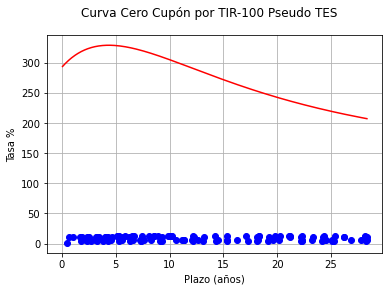

In [34]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]
plt.plot(venc.T, curva_2*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por TIR-100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-TIR_Opt_minimize.png')
plt.show()

In [35]:
################ Optimizacion por precios
import time
parametros['limits'] = np.array([0,200])
ini = time.time()
optimiz_result = betas_optimization_bound_prices(parametros)
fin = time.time()
betas_opt = optimiz_result.copy()
curva = funciones.NelsonSiegel_m(betas_opt, venc)
print(f'El algortimo de optimizacion por fuerza bruta en Precio tarda {(fin-ini):.2f} segundos')
#se demora menos de un min

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:234: RuntimeWarning: divide by zero encountered in true_divide
  y = beta_0+params[1]*((1-np.exp(-ven/params[3]))/(ven/params[3]))+\
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:235: RuntimeWarning: divide by zero encountered in true_divide
  params[2]*((1-np.exp(-ven/params[3]))/(ven/params[3])- \
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:236: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-ven/params[3]))


El algortimo de optimizacion por fuerza bruta en Precio tarda 31.24 segundos


d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:271: RuntimeWarning: overflow encountered in exp
  disc_factors = np.exp(np.multiply(-model_curve.T, venc)).T
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:273: RuntimeWarning: invalid value encountered in matmul
  dirty_prices = np.matmul(cpn_m.T,disc_factors)


In [36]:

#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt = funciones.dirty_price_m_ns(betas_opt,parametros)
tirs_opt = funciones.find_ytm_loop(parametros,prices_opt)
funciones.find_ytm_loop(parametros,prices_opt)
objetive_function_prices(betas_opt,parametros)
funciones.objetive_function(betas_opt,parametros)


d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:89: RuntimeWarning: invalid value encountered in power
  disc = (1/(1+d_r/100)**delta_t).T


1361.6505285466742

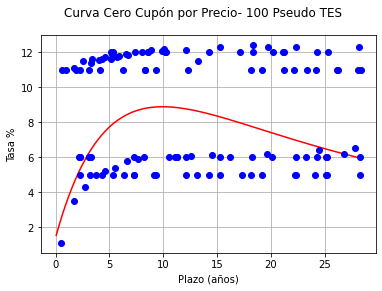

In [37]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]
plt.plot(venc.T, curva*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por Precio- 100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-Price_Opt.png')
plt.show()